1. Read the City Cemetery data into a pandas DataFrame. **Hint:** see the [`read_excel` function](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cc_df = pd.read_excel('../data/Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx')
cc_df.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia


In [58]:
cc_df.tail()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
19740,4-1846,"Kingsley, A., Capt.",Sep,9.0,28.0,1846.0,M,W,67.0,City,Feever,Cedar,lot,superintendent of Nashville Cemetery
19741,4-1846,infant,Sep,9.0,28.0,1846.0,M,W,NaN,City,Diarherea,Central,lot,son of John Bateman
19742,4-1846,"White, Lucinda",Sep,9.0,29.0,1846.0,F,W,25.0,City,Consumption,Central,200,Fees to be paid by M. Jennings
19743,5-1881,"Higgins, Rebecca",Apr,4.0,10.0,NaN,F,W,68.0,City,Heart Disease,Cherry,lot,"box paid, grave on lot"
19744,5-1881,"Eves, R.",Apr,4.0,25.0,NaN,M,W.,54.0,City,Heart Disease,Magnolia,lot,"box paid, grave on lot"


2. **Most Common Causes of Death.**  
   a. Find the 10 most common (known) recorded causes of death.  
   

In [59]:
counts = cc_df['Cause of Death/Burial'].value_counts()
top_10_causes = counts.head(10)
top_10_causes

Cause of Death/Burial
Consumption     1767
Unknown         1260
Still Born       841
Cholrea          667
Not Known        639
Old Age          604
Cholera          575
Pneumonia        516
Flux             469
Complication     446
Name: count, dtype: int64

b. Clean up some of the misspellings. Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".   
  

In [60]:
top_25_causes = counts.head(25)
top_25_causes

Cause of Death/Burial
Consumption       1767
Unknown           1260
Still Born         841
Cholrea            667
Not Known          639
Old Age            604
Cholera            575
Pneumonia          516
Flux               469
Complication       446
Cold               421
Teething           411
Typhoid Fever      310
Complicated        302
Brain Fever        286
Dropsy             284
Stil Born          278
Measles            236
Measels            224
Whooping Cough     205
Small Pox          196
Scarlot Fever      192
Infl of Bowels     156
Dropsey            151
Teethin            141
Name: count, dtype: int64

In [61]:
corrections = {
    'Cholrea': 'Cholera',
    'Still Born': 'Stillborn',
    'Stil Born': 'Stillborn',
    'Not Known': 'Unknown',
    'Teethin': 'Teething',
    'Measles': 'Measels',
    'Complicated': 'Complication',
    'Feever': 'Fever'}
cc_df = cc_df.replace(corrections)
counts = cc_df['Cause of Death/Burial'].value_counts()
top_25_causes = counts.head(25)
top_25_causes

Cause of Death/Burial
Unknown           1899
Consumption       1767
Cholera           1242
Stillborn         1204
Complication       748
Old Age            604
Teething           552
Pneumonia          516
Flux               469
Measels            460
Cold               421
Typhoid Fever      310
Brain Fever        286
Dropsy             284
Fever              275
Whooping Cough     205
Small Pox          196
Scarlot Fever      192
Infl of Bowels     156
Dropsey            151
Infl of Brain      137
Diptheria          129
Child Bed          124
Heart Disease      114
Croup              107
Name: count, dtype: int64

 **Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings.  
   c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.  


Text(0.5, 1.0, 'Top 10 Causes Of Death')

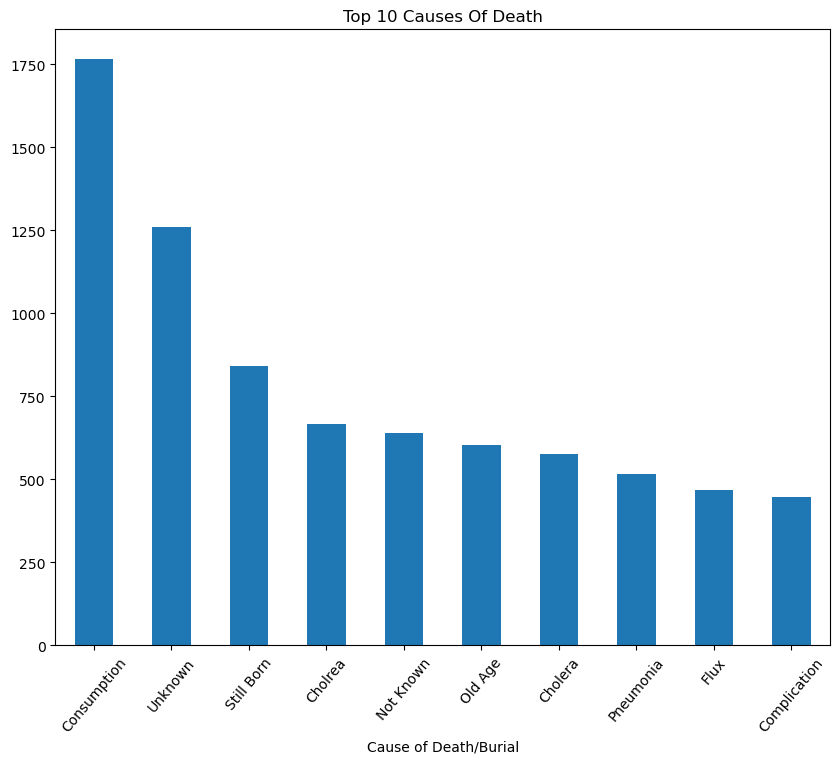

In [62]:
top_10_causes.plot(kind='bar',figsize=(10,8))
plt.xticks(rotation = 50) #One of my favorite things from the lecture!
plt.title('Top 10 Causes Of Death')

3. Create a line chart showing the number of burials per year.

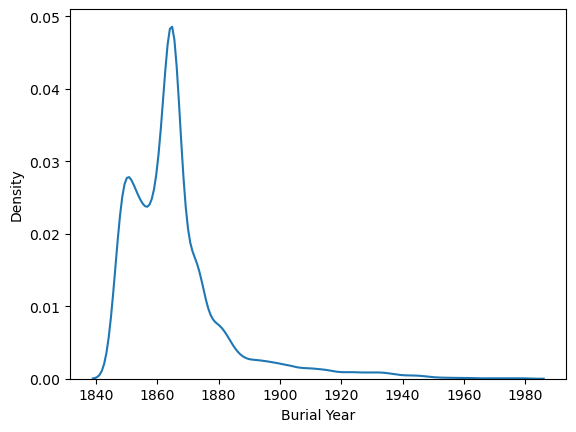

In [63]:
sns.kdeplot(cc_df['Burial Year']); #Daniel! Thanks.

4. **Burials per Month and Year**  
    a. Use the [crosstab function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.  

In [64]:
summary_table = pd.crosstab(index=cc_df['Burial Year'], columns=cc_df['Burial Month'])
summary_table

Burial Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Burial Year,,,,,,,,,,,,
1846.0,22,0,30,26,20,0,0,25,26,23,39,35
1847.0,35,61,34,34,43,40,47,38,26,36,47,35
1848.0,37,39,27,36,36,65,47,49,41,21,26,23
1849.0,43,36,33,64,46,96,231,64,62,24,18,28
1850.0,29,52,31,26,24,370,120,43,37,28,27,22
...,...,...,...,...,...,...,...,...,...,...,...,...
1972.0,1,0,0,0,0,0,0,0,0,0,0,0
1974.0,0,0,0,0,0,0,0,0,0,1,0,0
1977.0,0,0,0,0,0,0,0,1,1,1,0,0


b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.

In [65]:
cc_df['Burial Year'] = cc_df['Burial Year'].fillna(0) #filling in nulls?
cc_df['Burial Year'] = cc_df['Burial Year'].astype(int) #google says this error code is because there are nulls. Will skip and come back to fix it if I have more time.
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19745 entries, 0 to 19744
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 19745 non-null  object 
 1   Name                   19740 non-null  object 
 2   Burial Month           19706 non-null  object 
 3   Month No.              19706 non-null  float64
 4   Burial Day             19691 non-null  float64
 5   Burial Year            19745 non-null  int32  
 6   Sex                    19503 non-null  object 
 7   Race                   19698 non-null  object 
 8   Age                    11071 non-null  float64
 9   Residence              19687 non-null  object 
 10  Cause of Death/Burial  19428 non-null  object 
 11  Ave                    19092 non-null  object 
 12  Section/Lot            18625 non-null  object 
 13  Remarks                16396 non-null  object 
dtypes: float64(3), int32(1), object(10)
memory usage: 2.0+

c. Filter your table to show only the years 1846 through 1860.  

In [66]:
subset_years = cc_df[(cc_df['Burial Year'] >= 1846) & (cc_df['Burial Year'] <= 1860)]
subset_years

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
11752,4-1860,"Eagery, John",Aug,8.0,6.0,1860,M,W,40.0,City,Asthma,Maple,pauper,NaN
12197,4-1860,Infant,Apr,4.0,25.0,1860,F,W,NaN,City,Stillborn,Elm,lot,child of Sandifer Petty
12282,4-1860,"Taylor, Jacob, f.m.c.",Apr,4.0,1.0,1860,M,B,40.0,City,Unknown,Negro lot,pauper,free man Col'd
12283,4-1860,"Carow, Henry Dr.",Apr,4.0,2.0,1860,M,W,40.0,City,Shot reported by P. P. Truett,Cedar,lot,a native of Ireland
12284,4-1860,Infant,Apr,4.0,2.0,1860,M,W,NaN,City,Pneumonie,Mulbery,lot,child of Robert Culley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19738,4-1846,Emmily,Sep,9.0,25.0,1846,F,B,16.0,City,Fever,Poplar,200,slave to J. Chappell
19739,4-1846,infant,Sep,9.0,26.0,1846,M,W,NaN,City,Diarherea,Central,lot,son of Mr. E. Maguire Box grave
19740,4-1846,"Kingsley, A., Capt.",Sep,9.0,28.0,1846,M,W,67.0,City,Fever,Cedar,lot,superintendent of Nashville Cemetery
19741,4-1846,infant,Sep,9.0,28.0,1846,M,W,NaN,City,Diarherea,Central,lot,son of John Bateman


**Bonus** Display your table so that highlights any months that had over 100 burials. Hint: Look at styling in pandas: https://pandas.pydata.org/pandas-docs/version/1.0/user_guide/style.html  

d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?

5. **Burials per Decade**  
    a. Create a "Decade" column to show the decade in which a burial occurred.    

In [67]:
cc_df['Decade'] = (cc_df['Burial Year'] / 10) * 10
cc_df

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks,Decade
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot,1979.0
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of...",1979.0
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis,1979.0
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia,1978.0
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia,1978.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19740,4-1846,"Kingsley, A., Capt.",Sep,9.0,28.0,1846,M,W,67.0,City,Fever,Cedar,lot,superintendent of Nashville Cemetery,1846.0
19741,4-1846,infant,Sep,9.0,28.0,1846,M,W,NaN,City,Diarherea,Central,lot,son of John Bateman,1846.0
19742,4-1846,"White, Lucinda",Sep,9.0,29.0,1846,F,W,25.0,City,Consumption,Central,200,Fees to be paid by M. Jennings,1846.0
19743,5-1881,"Higgins, Rebecca",Apr,4.0,10.0,0,F,W,68.0,City,Heart Disease,Cherry,lot,"box paid, grave on lot",0.0


In [68]:
cc_df['Decade'] = cc_df['Decade'].fillna(0) #filling in nulls
cc_df['Decade'] = cc_df['Decade'].astype(int) #google says this error code is because there are nulls. Will skip and come back to fix it if I have more time.
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19745 entries, 0 to 19744
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 19745 non-null  object 
 1   Name                   19740 non-null  object 
 2   Burial Month           19706 non-null  object 
 3   Month No.              19706 non-null  float64
 4   Burial Day             19691 non-null  float64
 5   Burial Year            19745 non-null  int32  
 6   Sex                    19503 non-null  object 
 7   Race                   19698 non-null  object 
 8   Age                    11071 non-null  float64
 9   Residence              19687 non-null  object 
 10  Cause of Death/Burial  19428 non-null  object 
 11  Ave                    19092 non-null  object 
 12  Section/Lot            18625 non-null  object 
 13  Remarks                16396 non-null  object 
 14  Decade                 19745 non-null  int32  
dtypes:

In [69]:
cc_df['Decade'] = (cc_df['Burial Year'] / 10) * 10
cc_df

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks,Decade
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot,1979.0
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of...",1979.0
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis,1979.0
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia,1978.0
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia,1978.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19740,4-1846,"Kingsley, A., Capt.",Sep,9.0,28.0,1846,M,W,67.0,City,Fever,Cedar,lot,superintendent of Nashville Cemetery,1846.0
19741,4-1846,infant,Sep,9.0,28.0,1846,M,W,NaN,City,Diarherea,Central,lot,son of John Bateman,1846.0
19742,4-1846,"White, Lucinda",Sep,9.0,29.0,1846,F,W,25.0,City,Consumption,Central,200,Fees to be paid by M. Jennings,1846.0
19743,5-1881,"Higgins, Rebecca",Apr,4.0,10.0,0,F,W,68.0,City,Heart Disease,Cherry,lot,"box paid, grave on lot",0.0


b. Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials.  


In [70]:
gender = cc_df.query('Sex == "M" or Sex == "F"') #Selamawit found this code! Very simple and helpful.
decade_gender = pd.crosstab(gender.Decade,gender.Sex, normalize = 'index') * 100
decade_gender

Sex,F,M
Decade,,
0.0,50.000000,50.000000
1846.0,43.902439,56.097561
1847.0,43.789474,56.210526
1848.0,44.646925,55.353075
1849.0,48.048452,51.951548
...,...,...
1972.0,50.000000,50.000000
1974.0,0.000000,100.000000
1977.0,66.666667,33.333333


    c. Create a clustered bar chart to show how male and female burials have changed over time.

<Axes: xlabel='Decade'>

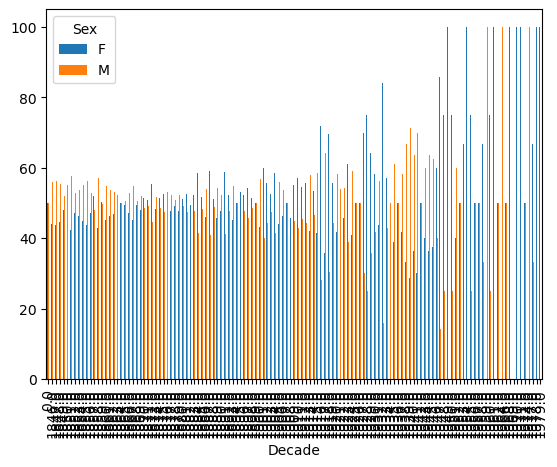

In [72]:
decade_gender.plot(kind = 'bar')


### Bonus Questions

6. **Burials per Age Group**  
    a. Add a column to the original dataset to classify each row to one of the following categories (0-18, 19-25, 26-40, 41-64, and 65+). (Hint: One way to do this is using the [`cut` function](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)).  
    b. Create a "Year Group" dividing the records up based on burial year. Use the following groups: Before 1880, 1880-1900, 1901-1920, After 1920.  
    c. Use a grouped bar chart to show how the proportion of burials per age group has changed over time. How would you describe the trends in terms of proportion of burials per age group over time?


7. **Last Names**  
    a. Create a new column titled Last Name. Extract the last name from the Name column by subsetting to all characters to the left of the comma. (Hint: See the pandas [string split function](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html). When you do this, make sure to consider cases where the name does not contain a comma.  
    b. What are the most common last names that appear?

8. The Civil War ended in April, 1865, with the last full year of fighting occurring in 1864.    
   a. Create a new DataFrame, burials_1864 by subsetting the full data to the rows for 1864 burials.  
   b. For any rows whose name contains the word "infant" (capitalized or lowercase), replace the "Age" value with 0.   
   c. Create a new column called age_category. If the individual was age 0 put "Infant". If the individual was not an infant but under age 18, put "Child". Everyone aged 18 and above should be listed as "Adult".  
   d.  Find the mean age for each age group.    
   e.  Find the last infant to be buried in 1864. Two ways this could be accomplished are sorting by both the month number and burial day or by creating a date column (for example, by using the [`to_datetime` function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and then sorting by this date column.